# A Machine Learning Approach to Equity Premium Prediction
By Shane Johnson, Catherine Markley, Yuanhao Niu, Nick Rocco (Fall 2018 Data Science Project)

We try to use machine learning methods to predict equity premium based on predictors from the seminal paper of Goyal and Welch (2008) updates until 2013. Our algorithms improves the prediction of equity premium

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("raw_predictors_until2013.csv")

Generate the predictors based on the raw data, as in Welch and Goyal (2008)

In [2]:
# equity premium, i.e., the total rate of return on the stock market minus the prevailing short-term interest rate.
df['premium'] = df['CRSP_SPvw'] - df['Rfree']

# Dividend Price Ratio (d/p) is the difference between the log of dividends and the log of prices. 
df['d/p'] = np.log(df['D12']) - np.log(df['Index'])

# Dividend Yield (d/y) is the difference between the log of dividends and the log of lagged prices.
df['d/y'] = np.log(df['D12'])- np.log(df['Index'].shift(1))

# Earnings Price Ratio (e/p) is the difference between the log of earnings and the log of prices.
df['e/p'] = np.log(df['E12']) - np.log(df['Index'])

# Dividend Payout Ratio (d/e) is the difference between the log of dividends and the log of earnings.
df['d/e'] = np.log(df['D12']) - np.log(df['E12'])

# Term Spread (tms) is the difference between the long term yield on government bonds and the T-bill.
df['tms'] = df['lty'] - df['tbl']

# Default Yield Spread (dfy): is the difference between BAA- and AAA- rated cor- porate bond yields.
df['dfy'] = df['BAA'] - df['AAA']

# Default Return Spread (dfr): is the difference between the return on long-term corporate bonds and returns on the long-term government bonds.
df['dfr'] = df['corpr'] - df['ltr']

In [3]:
# drop the first observation for 1926/12
df = df[1:]

We generate indicators for bull market. Machine learning methods are also used to predict the dicretion of market movements. 

In [4]:
sLength = len(df['yyyymm'])
# add the bullMarket column with random ints (to be replaced in next cell)
df['bull'] = pd.Series(np.random.randn(sLength), index=df.index)
# Create bullMarkert for ret
bull = []
for d in df['CRSP_SPvw']:
    if d > 0:
        bull.append(1)
    else:
        bull.append(0)
df['bull'] = bull

In [5]:
# drop the redundent variables
df = df.drop(columns=['Index','D12', 'E12', 'AAA', 'BAA', 'CRSP_SPvwx', 'corpr','Rfree', 'CRSP_SPvw'])

In [6]:
pd.options.mode.chained_assignment=None
df['csp'][0:124] = df['csp'][124:911].mean()
df['csp'][912:]  = df['csp'][124:911].mean()

In [7]:
premium = 0
count = 0

temp = df['premium']

cumsum = []

for i in temp:
    premium += i
    count += 1
    cumsum.append(premium/count)

df['cumsum'] = cumsum

In [8]:
# reorganize the dataframe
df = df[['yyyymm','Month','cumsum','bull','premium','d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']]
df

,yyyymm,Month,cumsum,bull,premium,d/p,d/y,e/p,d/e,svar,csp,b/m,ntis,tbl,lty,ltr,tms,dfy,dfr,infl
1,192701,1,-0.005602,0,-0.005602,-2.942374,-2.963349,-2.374773,-0.567601,0.000470,0.00037,0.443706,0.050834,0.0323,0.0351,0.0075,0.0028,0.0095,-0.0019,-0.011299
2,192702,2,0.018589,1,0.042780,-2.979535,-2.932946,-2.430353,-0.549182,0.000287,0.00037,0.428501,0.051682,0.0329,0.0347,0.0088,0.0018,0.0092,-0.0019,-0.005714
3,192703,3,0.013945,1,0.004657,-2.976535,-2.970053,-2.445079,-0.531456,0.000924,0.00037,0.469765,0.046370,0.0320,0.0331,0.0253,0.0011,0.0092,-0.0170,-0.005747
4,192704,4,0.013008,1,0.010196,-2.984225,-2.967143,-2.471309,-0.512916,0.000603,0.00037,0.456754,0.050518,0.0339,0.0333,-0.0005,-0.0006,0.0090,0.0060,0.000000
5,192705,5,0.022322,1,0.059578,-3.025963,-2.975058,-2.531446,-0.494518,0.000392,0.00037,0.434783,0.055279,0.0333,0.0327,0.0109,-0.0006,0.0093,-0.0120,0.005780
6,192706,6,0.014780,0,-0.022928,-3.007309,-3.016743,-2.531330,-0.475979,0.000825,0.00037,0.452385,0.058826,0.0307,0.0334,-0.0069,0.0027,0.0097,0.0112,0.011494
7,192707,7,0.024381,1,0.081983,-3.061144,-2.998173,-2.603707,-0.457437,0.000426,0.00037,0.414553,0.059754,0.0296,0.0333,0.0050,0.0037,0.0095,-0.0047,-0.017045
8,192708,8,0.025217,1,0.031070,-3.095764,-3.052225,-2.656742,-0.439023,0.001276,0.00037,0.396227,0.054526,0.0270,0.0329,0.0076,0.0059,0.0092,0.0007,-0.005780
9,192709,9,0.028058,1,0.050783,-3.129097,-3.086791,-2.707759,-0.421338,0.001123,0.00037,0.380586,0.094617,0.0268,0.0330,0.0018,0.0062,0.0088,0.0131,0.005814
10,192710,10,0.020315,0,-0.049371,-3.065650,-3.120203,-2.662875,-0.402774,0.001559,0.00037,0.413801,0.094370,0.0308,0.0325,0.0099,0.0017,0.0087,-0.0044,0.005780


In [9]:
features = df[['premium','d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']]
features.corr()

,premium,d/p,d/y,e/p,d/e,svar,csp,b/m,ntis,tbl,lty,ltr,tms,dfy,dfr,infl
premium,1.000000,-0.056434,0.063451,-0.058598,-0.003753,-0.188608,0.069422,-0.056720,-0.073504,-0.064743,-0.050359,0.088302,0.044983,-0.008912,0.142555,-0.001664
d/p,-0.056434,1.000000,0.992713,0.714175,0.474247,0.186807,0.397458,0.836060,0.149774,-0.068721,-0.132593,-0.021872,-0.119783,0.401169,-0.006139,-0.028503
d/y,0.063451,0.992713,1.000000,0.709334,0.470334,0.157295,0.403178,0.829082,0.141639,-0.069958,-0.133125,-0.011220,-0.118013,0.395991,0.010664,-0.026056
e/p,-0.058598,0.714175,0.709334,1.000000,-0.277550,-0.103158,0.273220,0.706632,0.074389,0.221115,0.103081,-0.003992,-0.299506,0.017633,-0.077303,0.153233
d/e,-0.003753,0.474247,0.470334,-0.277550,1.000000,0.386142,0.201868,0.258726,0.112003,-0.372430,-0.311636,-0.024999,0.212304,0.528429,0.088803,-0.231852
svar,-0.188608,0.186807,0.157295,-0.103158,0.386142,1.000000,0.015687,0.185605,-0.047950,-0.172325,-0.115262,0.077837,0.159484,0.567645,-0.071673,-0.215883
csp,0.069422,0.397458,0.403178,0.273220,0.201868,0.015687,1.000000,0.211180,0.126371,-0.519276,-0.617150,-0.098181,-0.090616,0.034044,0.004015,-0.021469
b/m,-0.056720,0.836060,0.829082,0.706632,0.258726,0.185605,0.211180,1.000000,-0.070592,0.130460,0.100142,-0.003186,-0.093468,0.462714,-0.013835,0.087765
ntis,-0.073504,0.149774,0.141639,0.074389,0.112003,-0.047950,0.126371,-0.070592,1.000000,-0.041509,-0.169661,-0.064757,-0.261968,-0.216257,0.031425,-0.073952
tbl,-0.064743,-0.068721,-0.069958,0.221115,-0.372430,-0.172325,-0.519276,0.130460,-0.041509,1.000000,0.904207,0.052908,-0.427280,-0.091346,-0.046993,0.261650


We recognize the autocorrelation in time series. In order to take full advantage of the past data, we include the past 20 years' data in the prediction. Here we generate predictors for the past 20 years, i.e. 240 months

In [10]:
past = 241

num = len(df.columns)
for i in range(4,num):
    name = df.columns[i]
    for j in range(1,past):
        t = str(j)
        df[name+"-"+t] = df[name].shift(j)

In [11]:
# drop the first past 20 years predictors
df = df[past-1:]

In [12]:
# drop the contemporanous predictors
df = df.drop(columns=['d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl'])

In [13]:
# column number 3845: 'yyyymm','Month',‘cumsum’，'bull','premium' + 16 indicator * 240 months 
len(df.columns)

3845

In [14]:
hist = df["premium"].hist(bins=10)

## Classification (Bull Market Prediction)

In [15]:
# for classification purpose
bull = df.bull
x = df.iloc[:,4:]
norm_x = (x- x.mean())/x.std(ddof=0)

In [16]:
# decision tree CART algorithm

from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


norm_x_train = norm_x[0:int(len(norm_x)/2)]
norm_x_test = norm_x[int(len(norm_x)/2):]
bull_train = bull[0:int(len(bull)/2)]
bull_test = bull[int(len(bull)/2):]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(norm_x_train, bull_train)
predicted = clf.predict(norm_x_test)
c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])


print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ??")


[[147  36]
 [  1 218]]
precision:  0.8582677165354331
recall:  0.9954337899543378
the main take way: ??


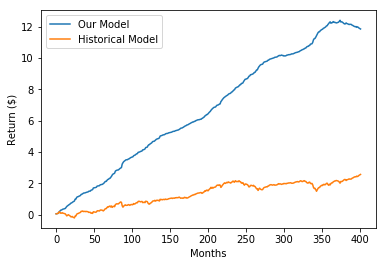

In [17]:
temp = df['premium']
premium = temp[int(len(temp)/2):]
cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(int(len(predicted))):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)
    
plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()

#print(predicted)

In [18]:
# naive Bayes 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(norm_x_train,bull_train).predict(norm_x_test)

predicted= gnb.predict(norm_x_test)

c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])

print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ???")

[[136 231]
 [ 12  23]]
precision:  0.09055118110236221
recall:  0.6571428571428571
the main take way: ???


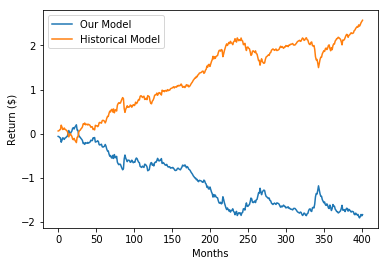

In [19]:
temp = df['premium']
premium = temp[int(len(temp)/2):]

cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(len(predicted)):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)
    
plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()

In [20]:
# Support Vector Classification

from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(norm_x_train, bull_train) 

predicted= clf.predict(norm_x_test)

c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])

print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ??? ")

[[  0   0]
 [148 254]]
precision:  1.0
recall:  0.6318407960199005
the main take way: ??? 


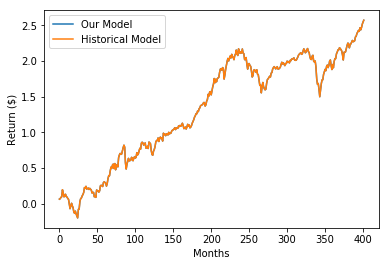

In [21]:
temp = df['premium']
premium = temp[int(len(temp)/2):]

cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(len(predicted)):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)


plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()

In [22]:
#K-Means

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(norm_x_train, bull_train)
predicted= clf.predict(norm_x_test)

c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])

print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ??? ")


[[ 73 149]
 [ 75 105]]
precision:  0.41338582677165353
recall:  0.5833333333333334
the main take way: ??? 


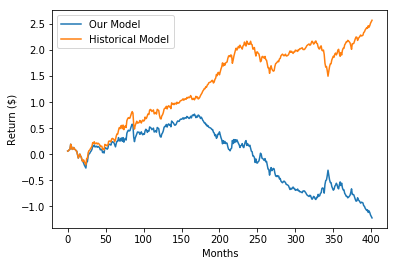

In [23]:
temp = df['premium']
premium = temp[int(len(temp)/2):]

cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(len(predicted)):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)
    
plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()